In [1]:
#auto reload modules 
%load_ext autoreload
%autoreload 2


In [6]:
from cassie import CassieEnv
from constants import *
import mediapy as media

DEBUG:matplotlib:matplotlib data path: c:\Users\Ajvendetta\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Ajvendetta\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32


In [13]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()

(array([ 3.18874690e-02, -7.78013696e-02,  1.42680328e-01, -1.25417942e+01,
         1.94693243e-01, -1.09554627e-03,  1.00306941e+00,  3.89386485e-03,
         1.57946699e-01, -1.41610166e-01,  2.18513343e-02, -1.26145840e+01,
        -4.28036611e-01,  1.65074625e-03,  1.00260527e+00, -8.56073221e-03,
        -7.24565461e-03,  4.06735699e-03,  9.24264608e-03,  9.99971428e-01,
        -6.03274156e-03,  4.46642078e-03, -8.94568938e-04,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [61]:
#detect ranges for each observation by moving the joints randomly and recording the min and max values

for i in range(100):
    observation, reward, terminated, _, info = cassie.step(cassie.action_space.sample())
    if(i==0):
        ranges = np.array([observation,observation],dtype=np.float16)
    else:
        ranges[0,:] = np.minimum(ranges[0,:],observation)
        ranges[1,:] = np.maximum(ranges[1,:],observation)


In [62]:
ranges

array([[ 0.136  ,  0.10596,  0.07184,  0.05246,  0.0406 ,  0.419  ,
         0.2856 ,  0.1522 ,  0.0856 ,  0.1913 ,  0.2032 ,  0.06006,
         0.03687,  0.4368 ,  0.2399 ,  0.1549 ,  0.1869 ,  0.0906 ,
         0.2607 ,  0.5205 ,  0.704  ,  0.596  ,  0.08374, -0.998  ,
        -0.992  ],
       [ 0.911  ,  0.8574 ,  0.932  ,  0.73   ,  0.683  ,  0.5977 ,
         0.755  ,  0.6616 ,  0.872  ,  0.9023 ,  0.9575 ,  0.8247 ,
         0.9644 ,  0.5576 ,  0.7847 ,  0.866  ,  0.7754 ,  0.641  ,
         0.663  ,  0.6606 ,  0.866  ,  0.8184 ,  0.3066 ,  0.998  ,
         1.     ]], dtype=float16)

In [63]:
cassie.reset()

(array([0.44965933, 0.48559012, 0.42708074, 0.81815331, 1.10939825,
        0.49631771, 0.2516891 , 1.00012261, 0.54412678, 0.52539947,
        0.42596407, 0.83538655, 1.13823882, 0.50211384, 0.25280066,
        0.99931643, 0.50026875, 0.44234983, 0.44850034, 0.99993271,
        0.50458748, 0.50493063, 0.49531712, 0.        , 1.        ]),
 {})

In [30]:
obs_ranges = np.array([np.floor(ranges[0,:]),np.ceil(ranges[1,:])],np.float16)

In [32]:
obs_ranges

array([[ -12.,  -16.,  -20.,  -51., -132.,   -1.,    0.,   -3.,  -15.,
         -18.,  -20.,  -50., -131.,   -1.,    0.,   -3.,  -15.,  -23.,
         -13.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  15.,   17.,   27.,   -4.,  -13.,    1.,    4.,   -0.,   13.,
          16.,   27.,   -5.,  -16.,    1.,    4.,   -0.,   15.,   29.,
          16.,    1.,    1.,    1.,    1.,    1.,    1.]], dtype=float16)

# Randomized moveoemnt 

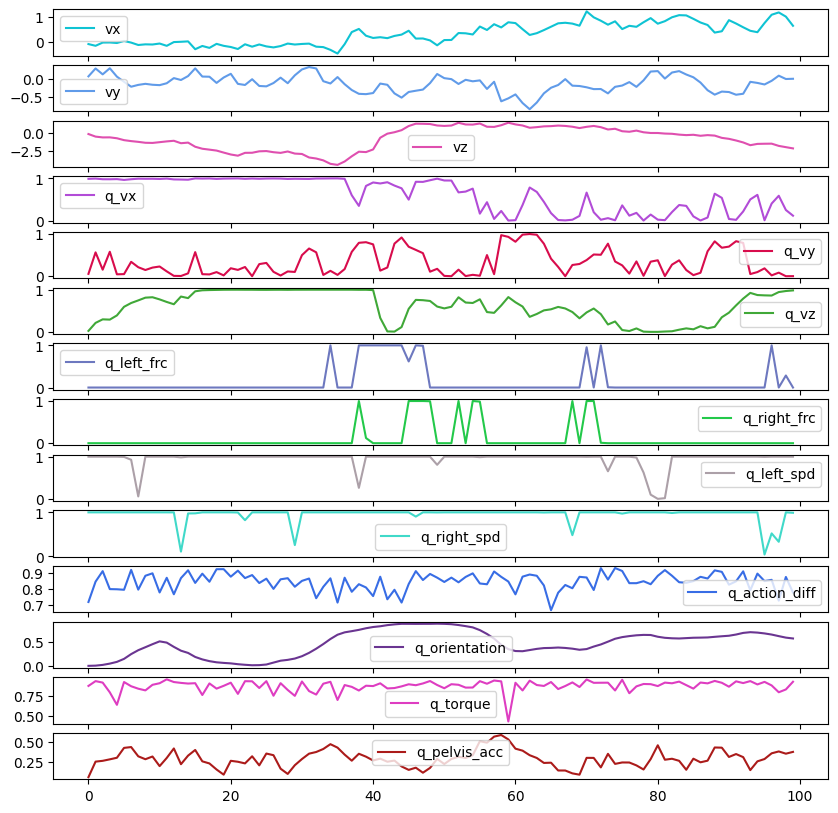

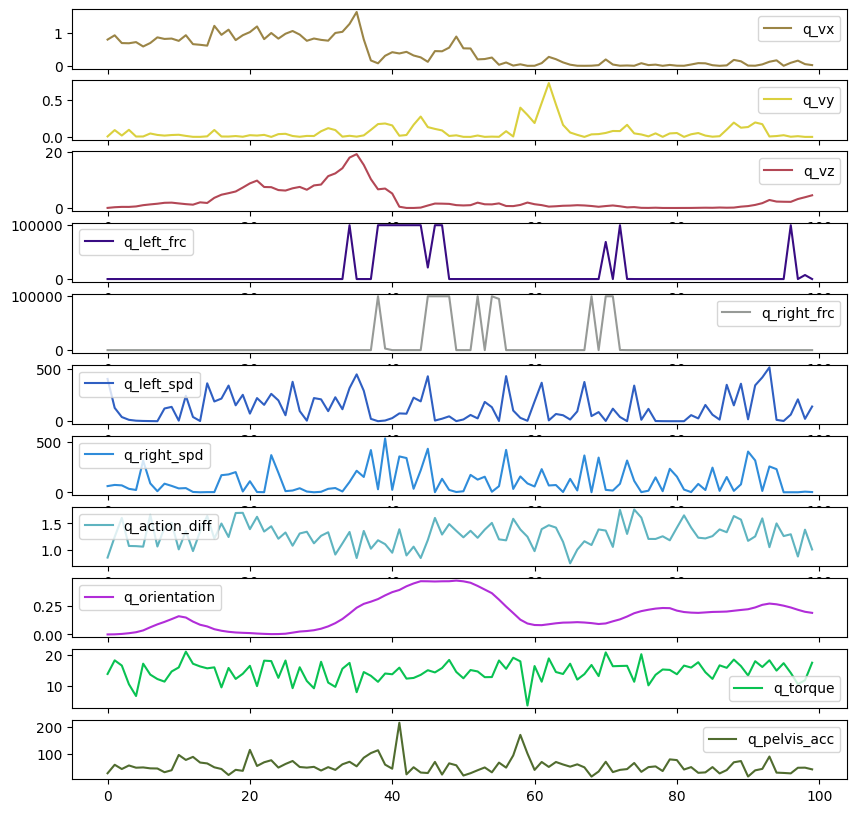

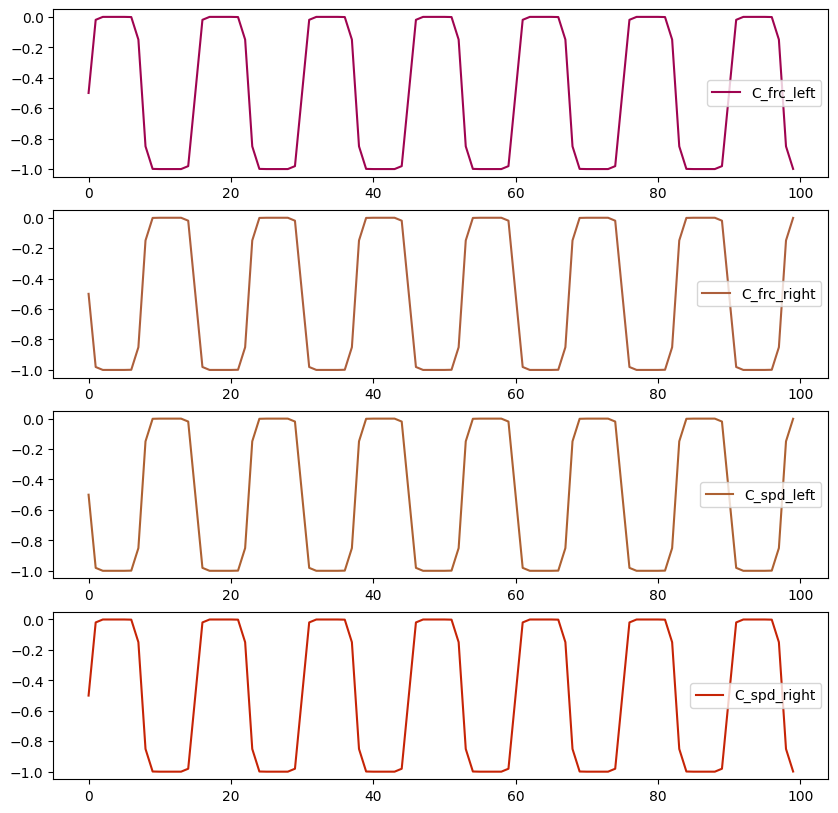

In [185]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({})
obs,_ = env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []

C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
for i in range(max_steps):

    action = cassie.action_space.sample()
    obs, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)

    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)

env.close()
#save video 
media.show_video( frames, fps=30)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])

In [78]:
import loader as l 
loader = l.Loader()
config  = loader.load_config("dict_config_test.yaml")

{'gamma': 0.9, 'lr': 0.001, 'train_batch_size': 15000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'swish', 'vf_share_layers': True, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.3, 'sgd_minibatch_size': 7500, 'num_sgd_iter': 2, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'kl_target': 0.01, 'vf_clip_param': 10.0, 'env': 'cassie-v0', 'disable_env_checking': True, 'clip_actions': True, 'framework': 'torch', 'num_rollout_workers': 1, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'recreate_failed_workers': True, 'observation_filter': 'MeanStdFilter', 'evaluation_interval': 2, 'evaluation_duration': 10, 'num_gpus': 1, 'num_cpus_per_worker': 1}


In [81]:
from ray.rllib.algorithms.ppo import PPOConfig
from cassie import CassieEnv, MyCallbacks
import constants as c 
import functions as f 
import numpy as np
import loader as l 
import caps as cp 
import torch
from ray.tune.registry import register_env

In [82]:
register_env("cassie-v0", lambda config: CassieEnv(config))

In [83]:

import ray 
ray.init(ignore_reinit_error=True)
trainer = PPOConfig().from_dict(config).build()


2023-05-13 14:01:19,103	INFO worker.py:1454 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(RolloutWorker pid=9060)  [repeated 3x across cluster]
(RolloutWorker pid=9060)   VALI

(RolloutWorker pid=3212) Device is  cuda


2023-05-13 14:01:24,890	WARNING util.py:67 -- Install gputil for GPU system monitoring.


In [86]:
trainer.load_checkpoint("checkpoint_000460")

2023-05-13 14:01:39,197	WARNING checkpoints.py:109 -- No `rllib_checkpoint.json` file found in checkpoint directory checkpoint_000460! Trying to extract checkpoint info from other files found in that dir.


Device is  cuda


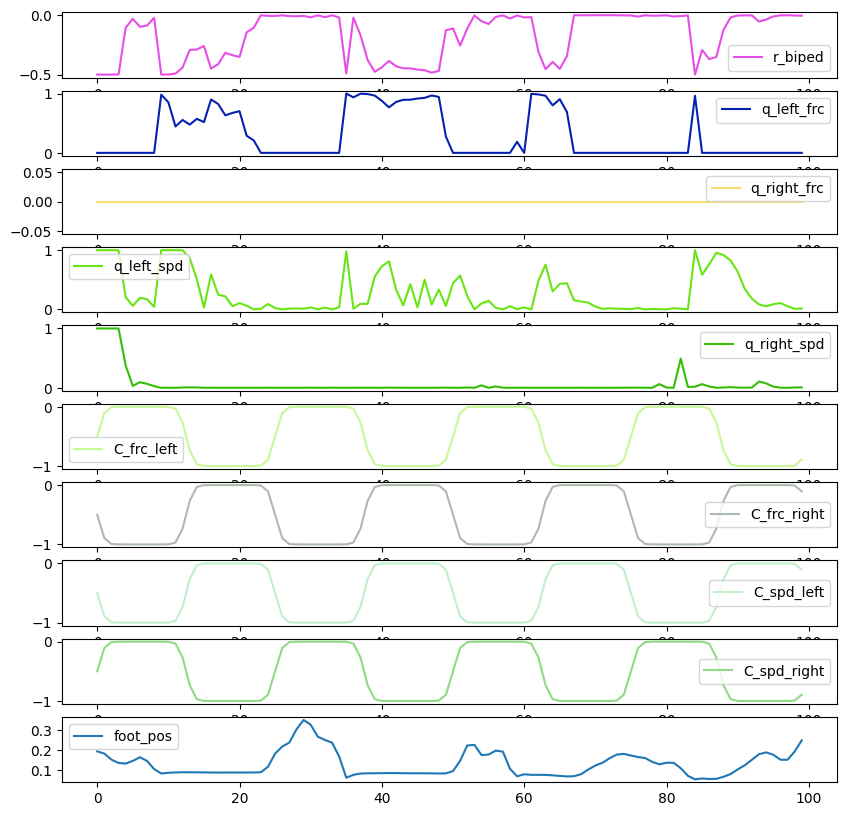

mean  564118.4341873601 Std 605188.2165930916 max 3654444.624291961 min 45621.013658859214


In [355]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({})
obs,_ = env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
rewards = {}
foot_pos = []
filterfn = trainer.workers.local_worker().filters["default_policy"]
C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
force_squared = []
for i in range(max_steps):
    
    obs = filterfn(obs)
    action = trainer.compute_single_action(obs)
    obs, reward, terminated, _, info = env.step(action)
    foot_pos.append(env.data.xpos[13,2])
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
    for reward,value in info['custom_rewards'].items():
        if reward not in rewards.keys():
            rewards[reward] = [value]
        else:
            rewards[reward].append(value)
    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)
    if(env.exponents['q_left_frc']>0):
 
        force_squared.append(env.exponents['q_left_frc'])
env.close()
#save video 
media.show_video( frames, fps=30)

#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 1, figsize=(10, 10))

axs[0].plot(rewards["r_biped"],color = np.random.rand(3,))
axs[0].legend(["r_biped"])
axs[1].plot(metrics["q_left_frc"],color = np.random.rand(3,))
axs[1].legend(["q_left_frc"])
axs[2].plot(metrics["q_right_frc"],color = np.random.rand(3,))
axs[2].legend(["q_right_frc"])
axs[3].plot(metrics["q_left_spd"],color = np.random.rand(3,))
axs[3].legend(["q_left_spd"])
axs[4].plot(metrics["q_right_spd"],color = np.random.rand(3,))
axs[4].legend(["q_right_spd"])
axs[5].plot(C["C_frc_left"],color = np.random.rand(3,))
axs[5].legend(["C_frc_left"])
axs[6].plot(C["C_frc_right"],color = np.random.rand(3,))
axs[6].legend(["C_frc_right"])
axs[7].plot(C["C_spd_left"],color = np.random.rand(3,))
axs[7].legend(["C_spd_left"])
axs[8].plot(C["C_spd_right"],color = np.random.rand(3,))
axs[8].legend(["C_spd_right"])
axs[9].plot(foot_pos)
axs[9].legend(["foot_pos"])
plt.show()
print("Left_Force mean " ,np.mean(force_squared), "Std" , np.std(force_squared), "max", np.max(force_squared), "min", np.min(force_squared))
# for i, metric in enumerate(rewards.keys()):
#     if(metric == "r_biped"):
#         #choose a random color for the plot 
#         s = np.random.rand(3,)

#         axs.plot(rewards[metric], color=s)
#         axs.legend([metric])
    

# fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
# for i, metric in enumerate(metrics.keys()):

#     #choose a random color for the plot 
#     s = np.random.rand(3,)

#     axs[i].plot(metrics[metric], color=s)
#     axs[i].legend([metric])

# plt.show()


# #do the same thing for the exponents
# fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
# for i, metric in enumerate(exponents.keys()):
#     #choose a random color for the plot 
#     s = np.random.rand(3,)

#     axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
#     axs[i].legend([metric])

# plt.show()

# #do the same for C 
# fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
# for i, metric in enumerate(C.keys()):
#     #choose a random color for the plot 
#     s = np.random.rand(3,)

#     axs[i].plot(C[metric], color=s)
#     axs[i].legend([metric])

In [144]:
cassie.reset()

first_values=[]
for i in range(200):
    cassie.step(np.zeros(10,) )
    print(len([x for x in cassie.data.cfrc_ext if np.linalg.norm(x)>0.0]))
    if(cassie.exponents["q_right_frc"]>0 or cassie.exponents["q_left_frc"]>0):
        print("i : ", i)
        force = cassie.exponents["q_right_frc"] if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"]
        print("FRC_"+ "right" if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"] , force)
                
        # print(cassie.data.cfrc_ext[1])
        # print(cassie.data.cfrc_ext[4])
    
        #look for the closest value to the force in the external forces

        
    print([np.round(np.linalg.norm(cassie.data.cfrc_ext[j]),2) for j in range(len(cassie.data.cfrc_ext))])

    # if(i==0):
    #     first_values = deepcopy(cassie.data.cfrc_ext)
    # else: 
    #     for j in range(len(first_values)):
    #         if(np.linalg.norm(cassie.data.cfrc_ext[j]-first_values[j])!=0):
    #             print(j, np.linalg.norm(cassie.data.cfrc_ext[j]), np.linalg.norm(first_values[j]))

8
[0.0, 0.0, 0.0, 0.0, 0.0, 3.9, 0.0, 0.0, 0.0, 0.0, 3.9, 0.0, 108.25, 108.18, 0.0, 0.0, 0.0, 3.97, 0.0, 0.0, 0.0, 0.0, 3.97, 0.0, 53.55, 53.55]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 51.52, 0.0, 0.0, 0.0, 0.0, 51.52, 0.0, 46.45, 46.45, 0.0, 0.0, 0.0, 16.22, 0.0, 0.0, 0.0, 0.0, 16.22, 0.0, 38.76, 38.76]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 8.63, 0.0, 0.0, 0.0, 0.0, 8.63, 0.0, 23.77, 23.77, 0.0, 0.0, 0.0, 2.14, 0.0, 0.0, 0.0, 0.0, 2.14, 0.0, 19.15, 19.15]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 45.5, 0.0, 0.0, 0.0, 0.0, 45.5, 0.0, 87.42, 87.42, 0.0, 0.0, 0.0, 11.15, 0.0, 0.0, 0.0, 0.0, 11.15, 0.0, 80.72, 80.72]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 11.47, 0.0, 0.0, 0.0, 0.0, 11.47, 0.0, 232.9, 232.9, 0.0, 0.0, 0.0, 9.33, 0.0, 0.0, 0.0, 0.0, 9.33, 0.0, 227.25, 227.25]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 12.25, 0.0, 0.0, 0.0, 0.0, 12.25, 0.0, 276.65, 276.65, 0.0, 0.0, 0.0, 2.8, 0.0, 0.0, 0.0, 0.0, 2.8, 0.0, 279.41, 279.41]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 2.05, 0.0, 0.0, 0.0, 0.0, 2.05, 0.0, 270.04, 270.04, 0.0, 0.0, 0.0, 2.35, 0.0, 0.0, 0.0,

In [ ]:
rigt
1 , 4

""

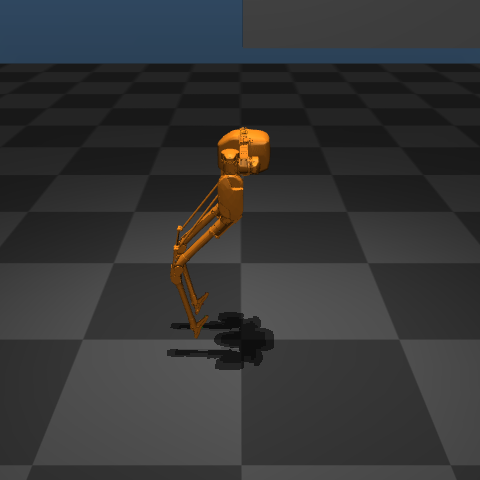

In [154]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()
media.show_image(cassie.render())

In [169]:
import mujoco as m

In [175]:
cassie.reset()
cassie.render_mode = "rgb_array"
frames = []

feet_in_contact = []
for i in range(200):
    cassie.step(np.zeros(10,)) 
    # print('number of contacts', cassie.data.ncon)
    contacts = [contact.geom2 for contact in cassie.data.contact]
    if( 49 in contacts):
        print(contacts.index(49))
        contact_force_left_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(49), contact_force_left_foot)
        print(contact_force_left_foot)
    if(33 in contacts):
        print(contacts.index(33))
        contact_force_right_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(33), contact_force_right_foot)
        print(contact_force_right_foot)
    # if( 49 in contacts):
    #     if("Right" not in feet_in_contact):
    #         feet_in_contact.append("Right")
    # else:
    #     if("Right" in feet_in_contact):
    #         feet_in_contact.remove("Right")
    #     # print('LEFT_FOOT',end=" ")
    # if(33 in contacts):
    #     if("Left" not in feet_in_contact):
    #         feet_in_contact.append("Left")
    # else:
    #     if("Left" in feet_in_contact):

    # feet_in_contact.remove("Left")
    # print(feet_in_contact)
    # # Feet Contact Forces

    # contact_force_left_foot = np.zeros(6)
    # m.mj_contactForce(cassie.model, cassie.data, 1, contact_force_left_foot)
    # frames.append(cassie.render())

media.show_video( frames, fps=10)

1
[927.60363322 -36.90285981   8.25798259   0.           0.
   0.        ]
0
[256.53452858  -2.55539081   1.54191639   0.           0.
   0.        ]
1
[214.51114751   8.96369007  -3.04872955   0.           0.
   0.        ]
0
[229.33052815  73.1347067    0.43435101   0.           0.
   0.        ]
1
[193.81244024 100.88163468   0.77397284   0.           0.
   0.        ]
0
[152.0504541   87.36883413   0.56831789   0.           0.
   0.        ]
1
[134.7603008   78.54368643   0.55438682   0.           0.
   0.        ]
0
[112.21987489  57.23691664   1.56844839   0.           0.
   0.        ]
1
[84.68613358 44.05319045 -0.25261134  0.          0.          0.        ]
0
[57.0990771  24.19820714  1.30186985  0.          0.          0.        ]
1
[24.16234123  9.1082364  -0.42181825  0.          0.          0.        ]
0
[ 5.30005508 -5.30005508  0.          0.          0.          0.        ]
1
[ 55.36423572 -23.6907703    0.21787831   0.           0.
   0.        ]
0
[ 40.8318959  -17.7

StopIteration: 

In [ ]:
33 droite 
49 gauche

In [223]:
cassie = CassieEnv({})

In [320]:
cassie.reset()

(array([0.44575566, 0.48451298, 0.42773367, 0.82039203, 1.10539613,
        0.50160211, 0.25078245, 0.9969476 , 0.54002505, 0.53606454,
        0.42506289, 0.8283584 , 1.13692399, 0.49771123, 0.25376974,
        0.99830839, 0.50013509, 0.44221191, 0.4481156 , 0.99997861,
        0.49638655, 0.50052249, 0.49716093, 0.        , 1.        ]),
 {})

In [ ]:
right 25
left 13

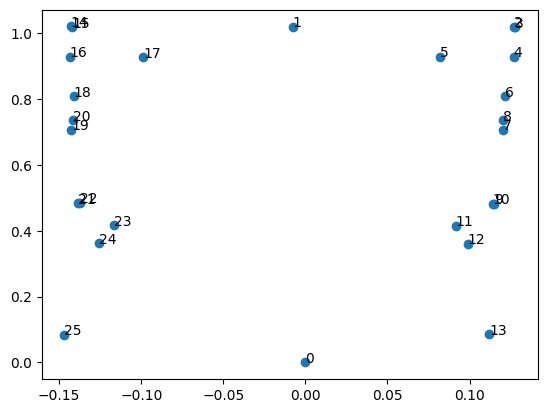

In [339]:

cassie.step(np.zeros(10,))
z = cassie.data.xpos[:,2]
y = cassie.data.xpos[:,1]

plt.scatter(y,z)
#add labels to the points
for i in range(len(y)):
    plt.annotate(i, (y[i], z[i]))

[0.         1.09022419 1.07732669 1.03906533 0.96412992 0.96230848
 0.86978529 0.77551375 0.80950842 0.71962183 0.70344841 0.65612958
 0.60631375 0.43567658 1.1260785  1.08781714 1.01269804 1.01558246
 0.89683922 0.79472483 0.82320326 0.55517797 0.56902428 0.50005364
 0.45421224 0.1497775 ]


""

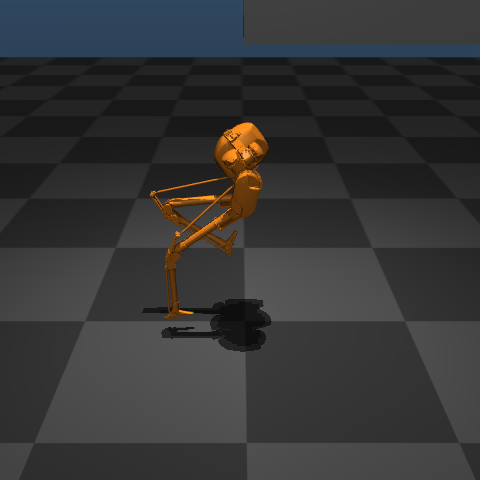

[0.         1.07403522 1.05755235 1.01917862 0.94492291 0.94422086
 0.85139783 0.76165041 0.7963343  0.73154827 0.71255129 0.67136636
 0.62441249 0.47867172 1.11354232 1.0751686  0.99993873 1.00466394
 0.88288568 0.78129124 0.81049602 0.54361243 0.55554781 0.48747718
 0.44094286 0.13698436]
[ 0 25 24 13 23 21 22 12 11 10  9  7 19  8 20  6 18  5  4 16 17  3  2  1
 15 14]
[15 16 14 22 18 21 20 19 24 23 17 25  1  0  5 11 12  6  8  7  3 10  4  9
 13  2]
[10 24  9 23 25 22 11 12 21 13  3 20 15  5  4  2  1 19 18  8  7 17  0 16
 14  6]


In [277]:
print(cassie.data.xpos[:,2])
cassie.step(cassie.action_space.sample())
media.show_image(cassie.render())
print(cassie.data.xpos[:,2])

print(np.argsort(cassie.data.xpos[:,2]))
print(np.argsort(cassie.data.xpos[:,1]))
print(np.argsort(cassie.data.xpos[:,0]))